# IMPORTS

In [1]:
from glob import glob
import os, pandas as pd
import cv2, numpy as np
import matplotlib.pyplot as plt
# from segmentation_models import *
# from segmentation_models.metrics import iou_score
import shutil
import pickle

/tmp/ipykernel_49919/1091163936.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import os, pandas as pd


In [5]:
df = pd.read_csv('/home/lucas/dataset_chest/dataset/Data_Entry_2017_v2020.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [ ]:
img_paths={os.path.basename(x): x for x in glob(os.path.join('.', '/home/lucas/dataset_chest/dataset', 'images*','images','*.png'))} 
img_paths

In [14]:
df_70 = pd.DataFrame(list(img_paths.items()), columns=['Image Index', 'path'])
df_70

,Image Index,path
0,00015114_002.png,/home/lucas/dataset_chest/dataset/images_06/im...
1,00013879_000.png,/home/lucas/dataset_chest/dataset/images_06/im...
2,00015087_002.png,/home/lucas/dataset_chest/dataset/images_06/im...
3,00015425_006.png,/home/lucas/dataset_chest/dataset/images_06/im...
4,00015427_000.png,/home/lucas/dataset_chest/dataset/images_06/im...
...,...,...
69995,00011325_003.png,/home/lucas/dataset_chest/dataset/images_04/im...
69996,00010352_060.png,/home/lucas/dataset_chest/dataset/images_04/im...
69997,00009396_001.png,/home/lucas/dataset_chest/dataset/images_04/im...
69998,00010590_000.png,/home/lucas/dataset_chest/dataset/images_04/im...


In [15]:
merged_df = pd.merge(df_70, df[['Image Index', 'Finding Labels', 'Patient ID']], on='Image Index', how='left')

In [16]:
merged_df

,Image Index,path,Finding Labels,Patient ID
0,00015114_002.png,/home/lucas/dataset_chest/dataset/images_06/im...,Pleural_Thickening,15114
1,00013879_000.png,/home/lucas/dataset_chest/dataset/images_06/im...,No Finding,13879
2,00015087_002.png,/home/lucas/dataset_chest/dataset/images_06/im...,Atelectasis|Consolidation|Infiltration,15087
3,00015425_006.png,/home/lucas/dataset_chest/dataset/images_06/im...,No Finding,15425
4,00015427_000.png,/home/lucas/dataset_chest/dataset/images_06/im...,No Finding,15427
...,...,...,...,...
69995,00011325_003.png,/home/lucas/dataset_chest/dataset/images_04/im...,No Finding,11325
69996,00010352_060.png,/home/lucas/dataset_chest/dataset/images_04/im...,Effusion,10352
69997,00009396_001.png,/home/lucas/dataset_chest/dataset/images_04/im...,No Finding,9396
69998,00010590_000.png,/home/lucas/dataset_chest/dataset/images_04/im...,Atelectasis|Effusion,10590


In [17]:
merged_df.to_csv("dataset_70.csv")

# LEITURA DATAFRAME

In [11]:
df = pd.read_csv('/home/lucas/dataset_chest/classificacao_multilabel_chest/segm_model/dataset_70.csv')
df = df.loc[:,['Image Index','Patient ID', 'Finding Labels', 'path']]
df

,Image Index,Patient ID,Finding Labels,path
0,00015114_002.png,15114,Pleural_Thickening,/home/lucas/dataset_chest/dataset/images_06/im...
1,00013879_000.png,13879,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...
2,00015087_002.png,15087,Atelectasis|Consolidation|Infiltration,/home/lucas/dataset_chest/dataset/images_06/im...
3,00015425_006.png,15425,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...
4,00015427_000.png,15427,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...
...,...,...,...,...
69995,00011325_003.png,11325,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...
69996,00010352_060.png,10352,Effusion,/home/lucas/dataset_chest/dataset/images_04/im...
69997,00009396_001.png,9396,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...
69998,00010590_000.png,10590,Atelectasis|Effusion,/home/lucas/dataset_chest/dataset/images_04/im...


In [37]:
# def save_masks(pred, names, output):
#     """
#         Salva as máscaras geradas

#         Parameters
#         ----------
#         pred: array-like, float32
#             Array contendo todas as máscaras preditas
#         names: list, 'string'
#             Lista de nomes dos arquivos das imagens
#         output: string
#             Nome do diretório onde as imagens serão salvas
            
#     """
#     for i in range(pred.shape[0]):
#         m = pred[i, :, :, 0]
#         cv2.imwrite(output + names[i] + '.png', 255 * ((m - m.min())/(m.max() - m.min())))

In [ ]:
# batch = []
# names = []
# i = 1
# BACKBONE = 'densenet169'
# name = 'Unet'
# # model = Unet(BACKBONE, input_shape=(512, 512, 3), classes=1)
# # model.load_weights('/home/lucas_araujo/pibic-2024/classificacao_multilabel_chest/segm_model/segm_models/Unet/weights/densenet169_best_weights.hdf5')
# pre_processing = get_preprocessing(BACKBONE)

# os.makedirs("./mask_chest", exist_ok=True)

# output_dir_base = 'mask_chest/images_'  # Diretório base para salvar as imagens
# output_dir_counter = 0

# for (path, name) in zip(df['path'], df['Image Index']):
#     img = cv2.imread(path)
#     img = cv2.resize(img, (512, 512))
#     batch.append(img)
#     names.append(name)
#     print(f"{i}/1000")
#     if i % 1000 == 0:
#         output_dir = f'{output_dir_base}{output_dir_counter}/'
#         os.makedirs(output_dir, exist_ok=True)

#         batch = np.array(batch)
#         model = Unet(BACKBONE, input_shape=(512, 512, 3), classes=1)
#         model.load_weights('/home/lucas_araujo/pibic-2024/classificacao_multilabel_chest/segm_model/segm_models/Unet/weights/densenet169_best_weights.hdf5')
#         X = pre_processing(batch)
#         pred = model.predict(X, verbose=1)

#         # Salvar masks dentro da pasta específica
#         save_masks(pred, names, output_dir)

#         # Limpar os batches e nomes
#         batch = []
#         names.clear()

#         # Incrementar o contador de diretório
#         output_dir_counter += 1

#     i += 1

# # Processar os dados restantes
# if batch:
#     output_dir = f'{output_dir_base}{output_dir_counter}/'
#     os.makedirs(output_dir, exist_ok=True)

#     batch = np.array(batch)
#     X = pre_processing(batch)
#     pred = model.predict(X, verbose=1)

#     # Salvar masks dentro da pasta específica
#     save_masks(pred, names, output_dir)

# Gerar Crops

In [12]:
paths_masks={os.path.basename(x): x for x in glob(os.path.join('.', '/home/lucas/dataset_chest/mask_chest/', 'images_*','*.png'))} 
novo_path_masks = {chave.replace('.png.png', '.png'): valor for chave, valor in paths_masks.items()}
df['path_masks']=df['Image Index'].map(novo_path_masks.get) #mapping image ids to all image paths
labels = df['Finding Labels'].str.get_dummies('|')
df = pd.concat([df, labels], axis=1)

In [13]:
df

,Image Index,Patient ID,Finding Labels,path,path_masks,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00015114_002.png,15114,Pleural_Thickening,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,00013879_000.png,13879,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_55...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,00015087_002.png,15087,Atelectasis|Consolidation|Infiltration,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00015425_006.png,15425,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00015427_000.png,15427,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,00011325_003.png,11325,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_43...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69996,00010352_060.png,10352,Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_39...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69997,00009396_001.png,9396,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_35...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69998,00010590_000.png,10590,Atelectasis|Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_40...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Visualizar original, Máscara, Crop

In [14]:
df

,Image Index,Patient ID,Finding Labels,path,path_masks,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00015114_002.png,15114,Pleural_Thickening,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,00013879_000.png,13879,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_55...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,00015087_002.png,15087,Atelectasis|Consolidation|Infiltration,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00015425_006.png,15425,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00015427_000.png,15427,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,00011325_003.png,11325,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_43...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69996,00010352_060.png,10352,Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_39...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69997,00009396_001.png,9396,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_35...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69998,00010590_000.png,10590,Atelectasis|Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_40...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


[  0 255]


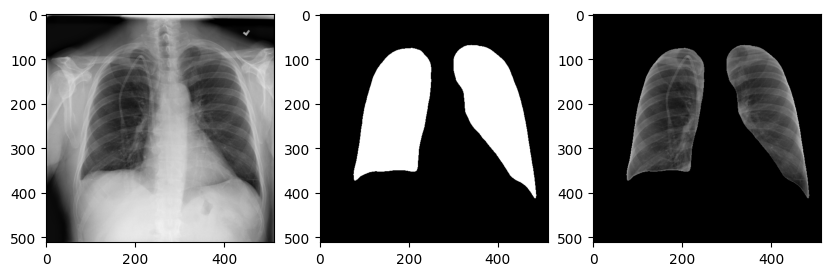

[  0 255]


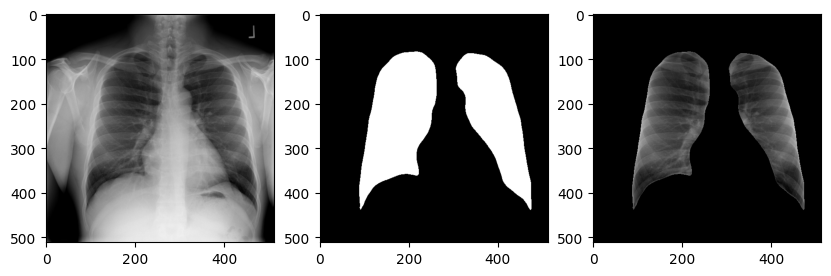

[  0 255]


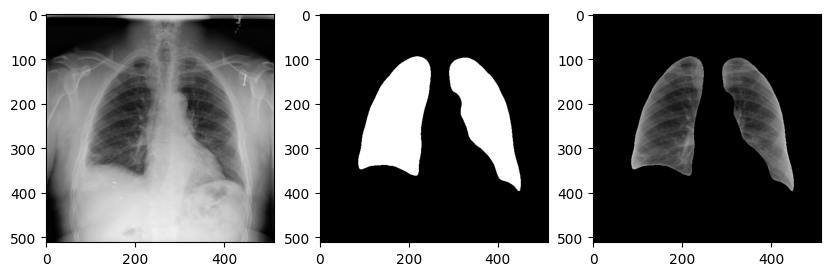

[  0 255]


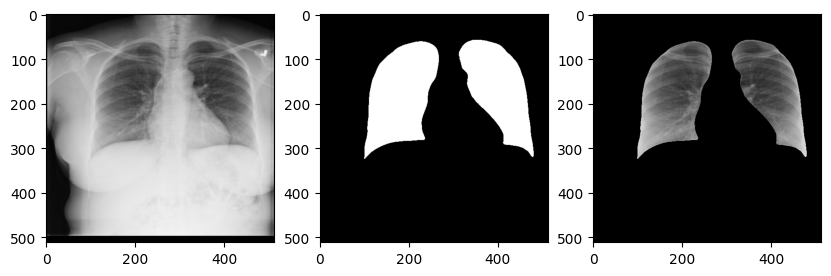

In [17]:
i=0
for (path, mask_path) in zip(df['path'], df['path_masks']):
    image = cv2.imread(path)
    mask = cv2.imread(mask_path)
    # image = image.astype('uint8')
    # mask = mask.astype('uint8')
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, thresholded_mask = cv2.threshold(mask_gray, 127, 255, cv2.THRESH_BINARY)
    print(np.unique(thresholded_mask))

    image = cv2.resize(image, (mask.shape[1], mask.shape[0]))
    # mask_2 = cv2.bitwise_not(mask_gray)

    Mask = cv2.bitwise_and(image, image, mask = thresholded_mask)  
    plt.figure(figsize=(10, 5))  # Ajuste o tamanho conforme necessário

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Converte de BGR para RGB para o matplotlib

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(thresholded_mask, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(Mask, cv2.COLOR_BGR2RGB))
    plt.show()

    i+=1
    if(i==4):
        break

# Salvando Crops em disco

In [22]:
len(os.listdir("/home/lucas/dataset_chest/mask_chest_crop"))

100

In [26]:
i=0
output_dir_base = "/home/lucas/dataset_chest/mask_chest_crop/"
os.makedirs(output_dir_base, exist_ok=True)
for (name, path, mask_path) in zip(df['Image Index'],df['path'], df['path_masks']):
    print(f"{i}/70000")
    # if(i==1000):
        # break
    image = cv2.imread(path)
    mask = cv2.imread(mask_path)
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, thresholded_mask = cv2.threshold(mask_gray, 127, 255, cv2.THRESH_BINARY)
    image = cv2.resize(image, (mask.shape[1], mask.shape[0]))

    # Aplicando máscara
    masked_image = cv2.bitwise_and(image, image, mask = thresholded_mask)
    # Salvar as imagens
    cv2.imwrite(os.path.join(output_dir_base, f"{name}"), masked_image)
    i+=1

   

0/70000
1/70000
2/70000
3/70000
4/70000
5/70000
6/70000
7/70000
8/70000
9/70000
10/70000
11/70000
12/70000
13/70000
14/70000
15/70000
16/70000
17/70000
18/70000
19/70000
20/70000
21/70000
22/70000
23/70000
24/70000
25/70000
26/70000
27/70000
28/70000
29/70000
30/70000
31/70000
32/70000
33/70000
34/70000
35/70000
36/70000
37/70000
38/70000
39/70000
40/70000
41/70000
42/70000
43/70000
44/70000
45/70000
46/70000
47/70000
48/70000
49/70000
50/70000
51/70000
52/70000
53/70000
54/70000
55/70000
56/70000
57/70000
58/70000
59/70000
60/70000
61/70000
62/70000
63/70000
64/70000
65/70000
66/70000
67/70000
68/70000
69/70000
70/70000
71/70000
72/70000
73/70000
74/70000
75/70000
76/70000
77/70000
78/70000
79/70000
80/70000
81/70000
82/70000
83/70000
84/70000
85/70000
86/70000
87/70000
88/70000
89/70000
90/70000
91/70000
92/70000
93/70000
94/70000
95/70000
96/70000
97/70000
98/70000
99/70000
100/70000
101/70000
102/70000
103/70000
104/70000
105/70000
106/70000
107/70000
108/70000
109/70000
110/70000


libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


17709/70000
17710/70000
17711/70000
17712/70000
17713/70000
17714/70000
17715/70000
17716/70000
17717/70000
17718/70000
17719/70000
17720/70000
17721/70000
17722/70000
17723/70000
17724/70000
17725/70000
17726/70000
17727/70000
17728/70000
17729/70000
17730/70000
17731/70000
17732/70000
17733/70000
17734/70000
17735/70000
17736/70000
17737/70000
17738/70000
17739/70000
17740/70000
17741/70000
17742/70000
17743/70000
17744/70000
17745/70000
17746/70000
17747/70000
17748/70000
17749/70000
17750/70000
17751/70000
17752/70000
17753/70000
17754/70000
17755/70000
17756/70000
17757/70000
17758/70000
17759/70000
17760/70000
17761/70000
17762/70000
17763/70000
17764/70000
17765/70000
17766/70000
17767/70000
17768/70000
17769/70000
17770/70000
17771/70000
17772/70000
17773/70000
17774/70000
17775/70000
17776/70000
17777/70000
17778/70000
17779/70000
17780/70000
17781/70000
17782/70000
17783/70000
17784/70000
17785/70000
17786/70000
17787/70000
17788/70000
17789/70000
17790/70000
17791/70000
1779

 dataset_70.csv     'segmentation_model _70.ipynb'
 evaluated.txt	     segmentation_model.ipynb
 gerar_mascaras.py   teste_segmentation_models.py
 names.txt


# Juntar Dataframe(Imagens Globais e Crops)

In [27]:
df

,Image Index,Patient ID,Finding Labels,path,path_masks,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00015114_002.png,15114,Pleural_Thickening,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,00013879_000.png,13879,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_55...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,00015087_002.png,15087,Atelectasis|Consolidation|Infiltration,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00015425_006.png,15425,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00015427_000.png,15427,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,00011325_003.png,11325,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_43...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69996,00010352_060.png,10352,Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_39...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69997,00009396_001.png,9396,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_35...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69998,00010590_000.png,10590,Atelectasis|Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_40...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
paths_crops={os.path.basename(x): x for x in glob(os.path.join('.', '/home/lucas/dataset_chest/mask_chest_crop','*.png'))}
paths_crops 
df['path_crop']=df['Image Index'].map(paths_crops.get) #mapping image ids to all image paths
df

,Image Index,Patient ID,Finding Labels,path,path_masks,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path_crop
0,00015114_002.png,15114,Pleural_Thickening,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
1,00013879_000.png,13879,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_55...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
2,00015087_002.png,15087,Atelectasis|Consolidation|Infiltration,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
3,00015425_006.png,15425,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
4,00015427_000.png,15427,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,00011325_003.png,11325,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_43...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
69996,00010352_060.png,10352,Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_39...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...
69997,00009396_001.png,9396,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_35...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0000...
69998,00010590_000.png,10590,Atelectasis|Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_40...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,/home/lucas/dataset_chest/mask_chest_crop/0001...


In [30]:
df.to_csv("df_ori_mask_crop.csv")

In [19]:
df[df.isnull().any(axis=1)]

,Image Index,Patient ID,Finding Labels,path,path_crop


### One Hot Encoding

In [20]:
labels = df['Finding Labels'].str.get_dummies('|')
df = pd.concat([df, labels], axis=1)
df

,Image Index,Patient ID,Finding Labels,path,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,Cardiomegaly,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,Cardiomegaly|Emphysema,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,1,Cardiomegaly|Effusion,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,2,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,3,Hernia,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,30802,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,30803,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,30804,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Dataloaders

In [21]:
df

,Image Index,Patient ID,Finding Labels,path,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,Cardiomegaly,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,Cardiomegaly|Emphysema,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,1,Cardiomegaly|Effusion,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,2,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,3,Hernia,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,30802,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,30803,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,30804,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
df_experimento = df.sample(n=100)
df_experimento

,Image Index,Patient ID,Finding Labels,path,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
51675,00013049_010.png,13049,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12702,00003333_002.png,3333,Infiltration|Mass,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
104939,00028148_004.png,28148,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
83243,00020438_009.png,20438,Atelectasis|Consolidation,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99352,00026278_001.png,26278,Pneumothorax,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46718,00011925_043.png,11925,Effusion|Mass,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
52761,00013307_007.png,13307,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41184,00010674_001.png,10674,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
67611,00016715_009.png,16715,Edema,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


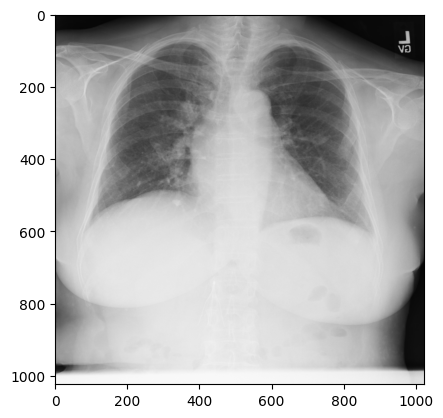

In [45]:
for path in df_experimento['path']:
    img = cv2.imread(path)
    # print(img)
    # print(np.unique(img))
    plt.imshow(img)
    break

In [23]:
labels = [
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Effusion",
    "Emphysema",
    "Fibrosis",
    "Hernia",
    "Infiltration",
    "Mass",
    "No Finding",
    "Nodule",
    "Pleural_Thickening",
    "Pneumonia",
    "Pneumothorax"] 

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization= True
)
generator = datagen.flow_from_dataframe(
    dataframe=df_experimento,
    directory=None,
    x_col='path_crop',
    y_col=labels,
    class_mode="raw",
    target_size=(224, 224),
    batch_size=8,
    shuffle=True,
)
x, y = generator.__getitem__(0)

Found 100 validated image filenames.
